<a href="https://colab.research.google.com/github/pedro-de-bastos/CS166-Modeling-Simulation-and-Decision-Making/blob/main/PCW_CS166_Session_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCW: CS166 Session 24
Pedro M. de Bastos

# Question 1

## (a)

In [63]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rd
import numpy as np

p_i = 0.5 # infection probability
p_r = 0.5 # recovery probability
n = 100
p_e = 0.1

def initialize():
    global g
    g = nx.erdos_renyi_graph(n, p_e)
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if np.random.random() < .5 else 0

def observe():
    global g
    plt.figure(figsize = (6, 5))
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    new_g = g.copy()
    new_g.pos = g.pos
    for a in new_g.nodes():
      if new_g.nodes[a]['state'] == 0: # if susceptible
          try:
            b = rd.choice(list(new_g.neighbors(a)))
            if new_g.nodes[b]['state'] == 1: # if neighbor b is infected
                new_g.nodes[a]['state'] = 1 if np.random.random() < p_i else 0
          except:
            continue
      else: # if infected
          new_g.nodes[a]['state'] = 0 if np.random.random() < p_r else 1
    g = new_g


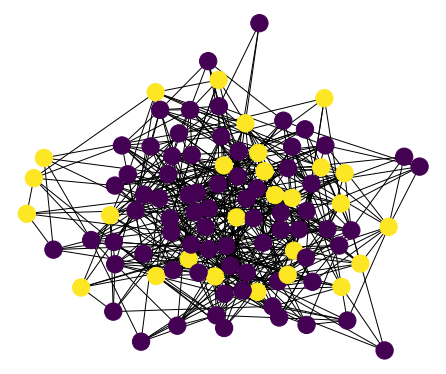

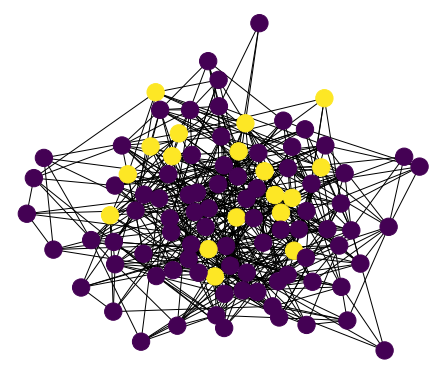

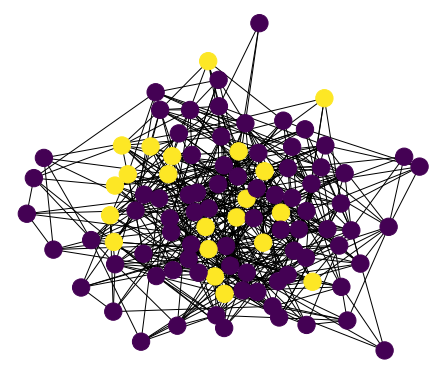

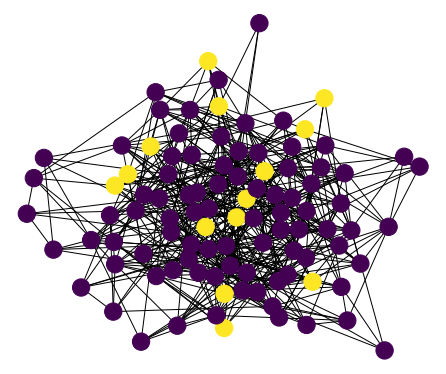

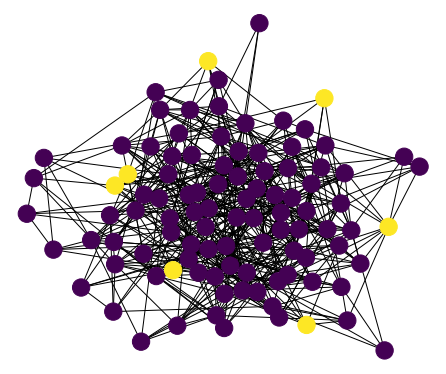

In [64]:
#Test 1
p_i = 0.5 # infection probability
p_r = 0.5 # recovery probability
n = 100
p_e = 0.1

initialize()
for i in range(100):
  update()
  if i // 5 == 0:
    observe()

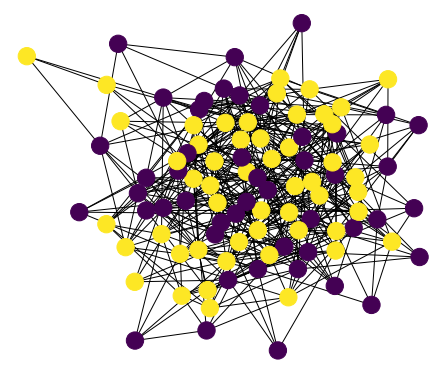

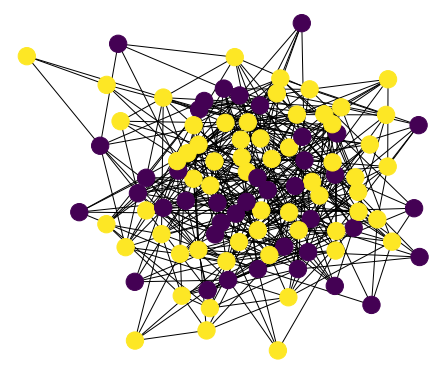

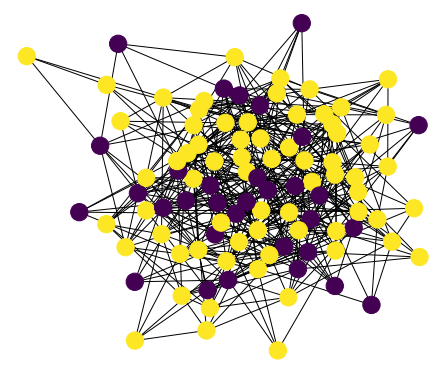

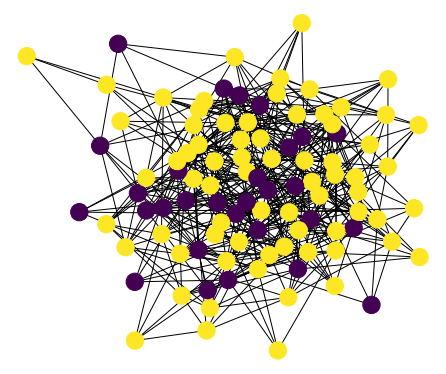

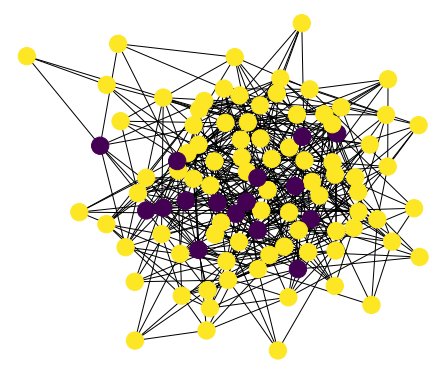

In [65]:
#Test 2
p_i = 0.5 # infection probability
p_r = 0.04 # recovery probability
n = 100
p_e = 0.1

initialize()
for i in range(100):
  update()
  if i // 5 == 0:
    observe()

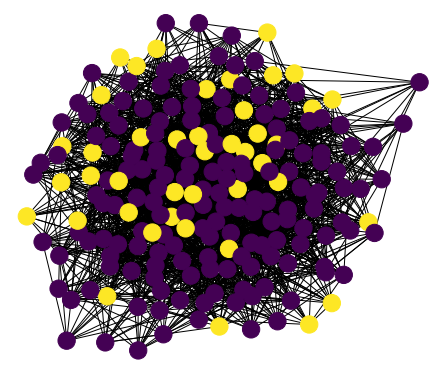

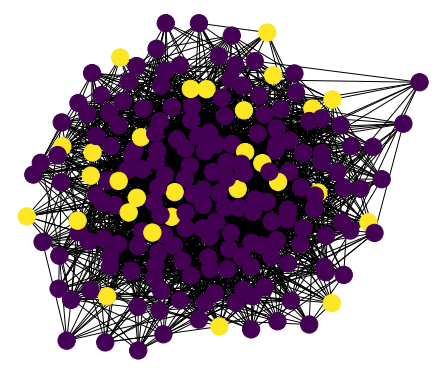

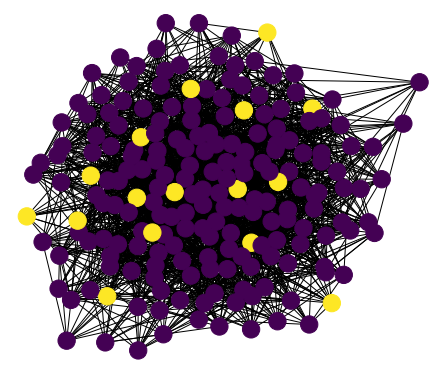

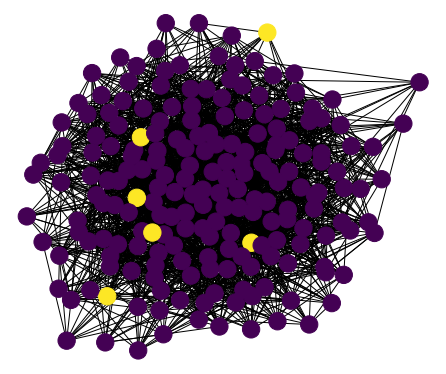

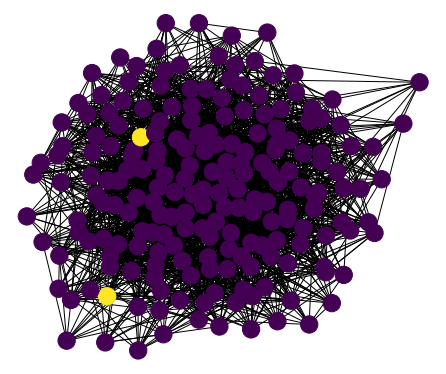

In [66]:
#Test 3
p_i = 0.04 # infection probability
p_r = 0.5 # recovery probability
n = 200
p_e = 0.1

initialize()
for i in range(200):
  update()
  if i // 5 == 0:
    observe()

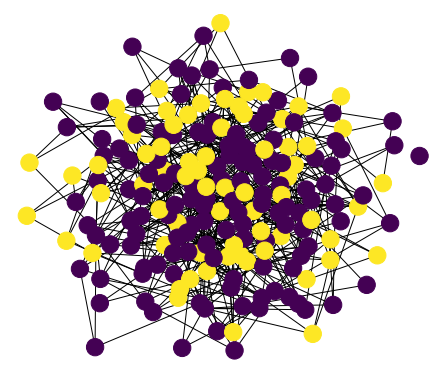

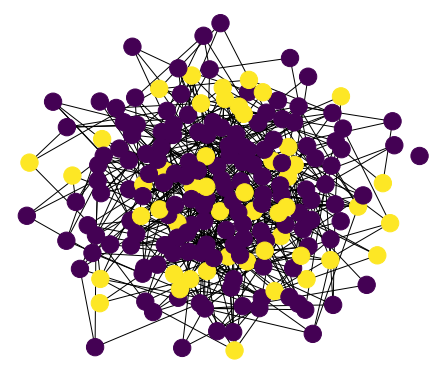

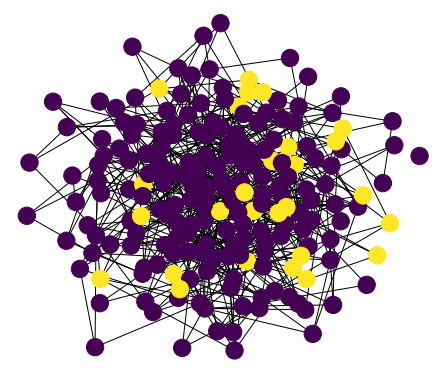

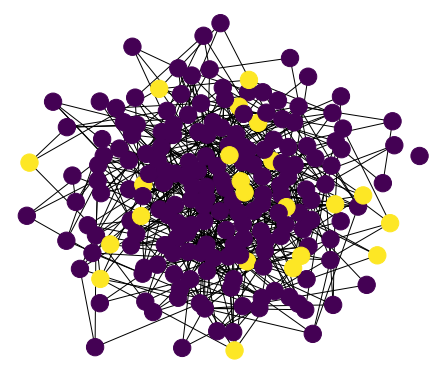

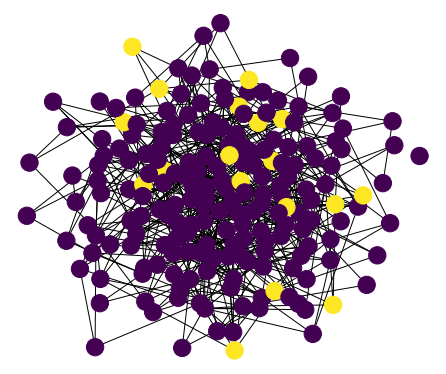

In [67]:
#Test 4
p_i = 0.5 # infection probability
p_r = 0.5 # recovery probability
n = 200
p_e = 0.05

initialize()
for i in g.edges():
  if np.random.random()>0.5: #halving the number of edges
    g.remove_edge(i[0], i[1])
for i in range(200):
  update()
  if i // 5 == 0:
    observe()

## (b) 
**Question: Why does using synchronous or asynchronous updating make a
difference?**

Asynchronous updating breaks the assumption from the MFA, wherein we look at the macro-state of the graph currently, and predict the next macro-state based on that.







## (c)
**For the mean-field approximation described in Section 18.5, why is it appropriate to use the synchronous update method and not the asynchronous one?**

One factor is that the asynchronous update makes it so that a portion of the graph is 'updated', and another portion isn't. This disrupts the assumption of the approximation of a mean state telling us something about the next state, given that we have equations that require a homogeneously updated graph to predict its next state.

# Question 2


## (a)


In [95]:
erdos = nx.erdos_renyi_graph(1000, 0.04)
watts = nx.watts_strogatz_graph(1000, 40, 0.2)
barbasi = nx.barabasi_albert_graph(1000, 20)

## (b)

In [77]:
def get_degree(g):
  degrees = [g.degree(i) for i in g.nodes()]
  return np.mean(degrees)

In [82]:
get_degree(erdos)

39.966

In [83]:
get_degree(watts)

40.0

In [96]:
get_degree(barbasi)

39.2

## (c)

In [121]:
def get_neighbor_degree_2(g):
  tally = []

  for edge in g.edges():
    for i in edge:
      neighbors = nx.neighbors(g, i)
      n_neighbors = len(list(neighbors))
      tally.append(n_neighbors)

  return np.mean(tally)

def get_neighbor_degree(g):
  results = nx.neighbor_degree.average_neighbor_degree(g).values()
  return np.mean(list(results))

print(get_neighbor_degree(erdos))
print(get_neighbor_degree_2(erdos))

41.014404274127536
40.99925205684368


## (d)

In [123]:
for i in [erdos, watts, barbasi]:
  print(f"You have {get_degree(i)} friends, your friends have {get_neighbor_degree(i)} friends.")

You have 40.11 friends, your friends have 41.014404274127536 friends.
You have 40.0 friends, your friends have 40.18118910213442 friends.
You have 39.2 friends, your friends have 62.13420223113526 friends.


As expected according to Sayama, your friends always have more friends than you do (that is, a node's neighbors has on average more neighbors than the node itself).